In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [14]:
## Set the working directory and import data
os.chdir("D:/K2Analytics/datafile")
inc_exp = pd.read_csv("Inc_Exp_Data.csv")
inc_exp.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [15]:
inc_exp.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [16]:
inc_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Mthly_HH_Income             50 non-null int64
Mthly_HH_Expense            50 non-null int64
No_of_Fly_Members           50 non-null int64
Emi_or_Rent_Amt             50 non-null int64
Annual_HH_Income            50 non-null int64
Highest_Qualified_Member    50 non-null object
No_of_Earning_Members       50 non-null int64
dtypes: int64(6), object(1)
memory usage: 2.8+ KB


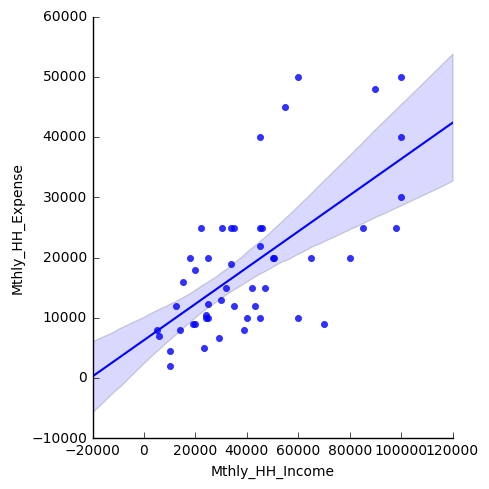

In [11]:
## Scatter Plot
import seaborn as sns
sns.lmplot(x ="Mthly_HH_Income", 
           y = "Mthly_HH_Expense", data = inc_exp)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


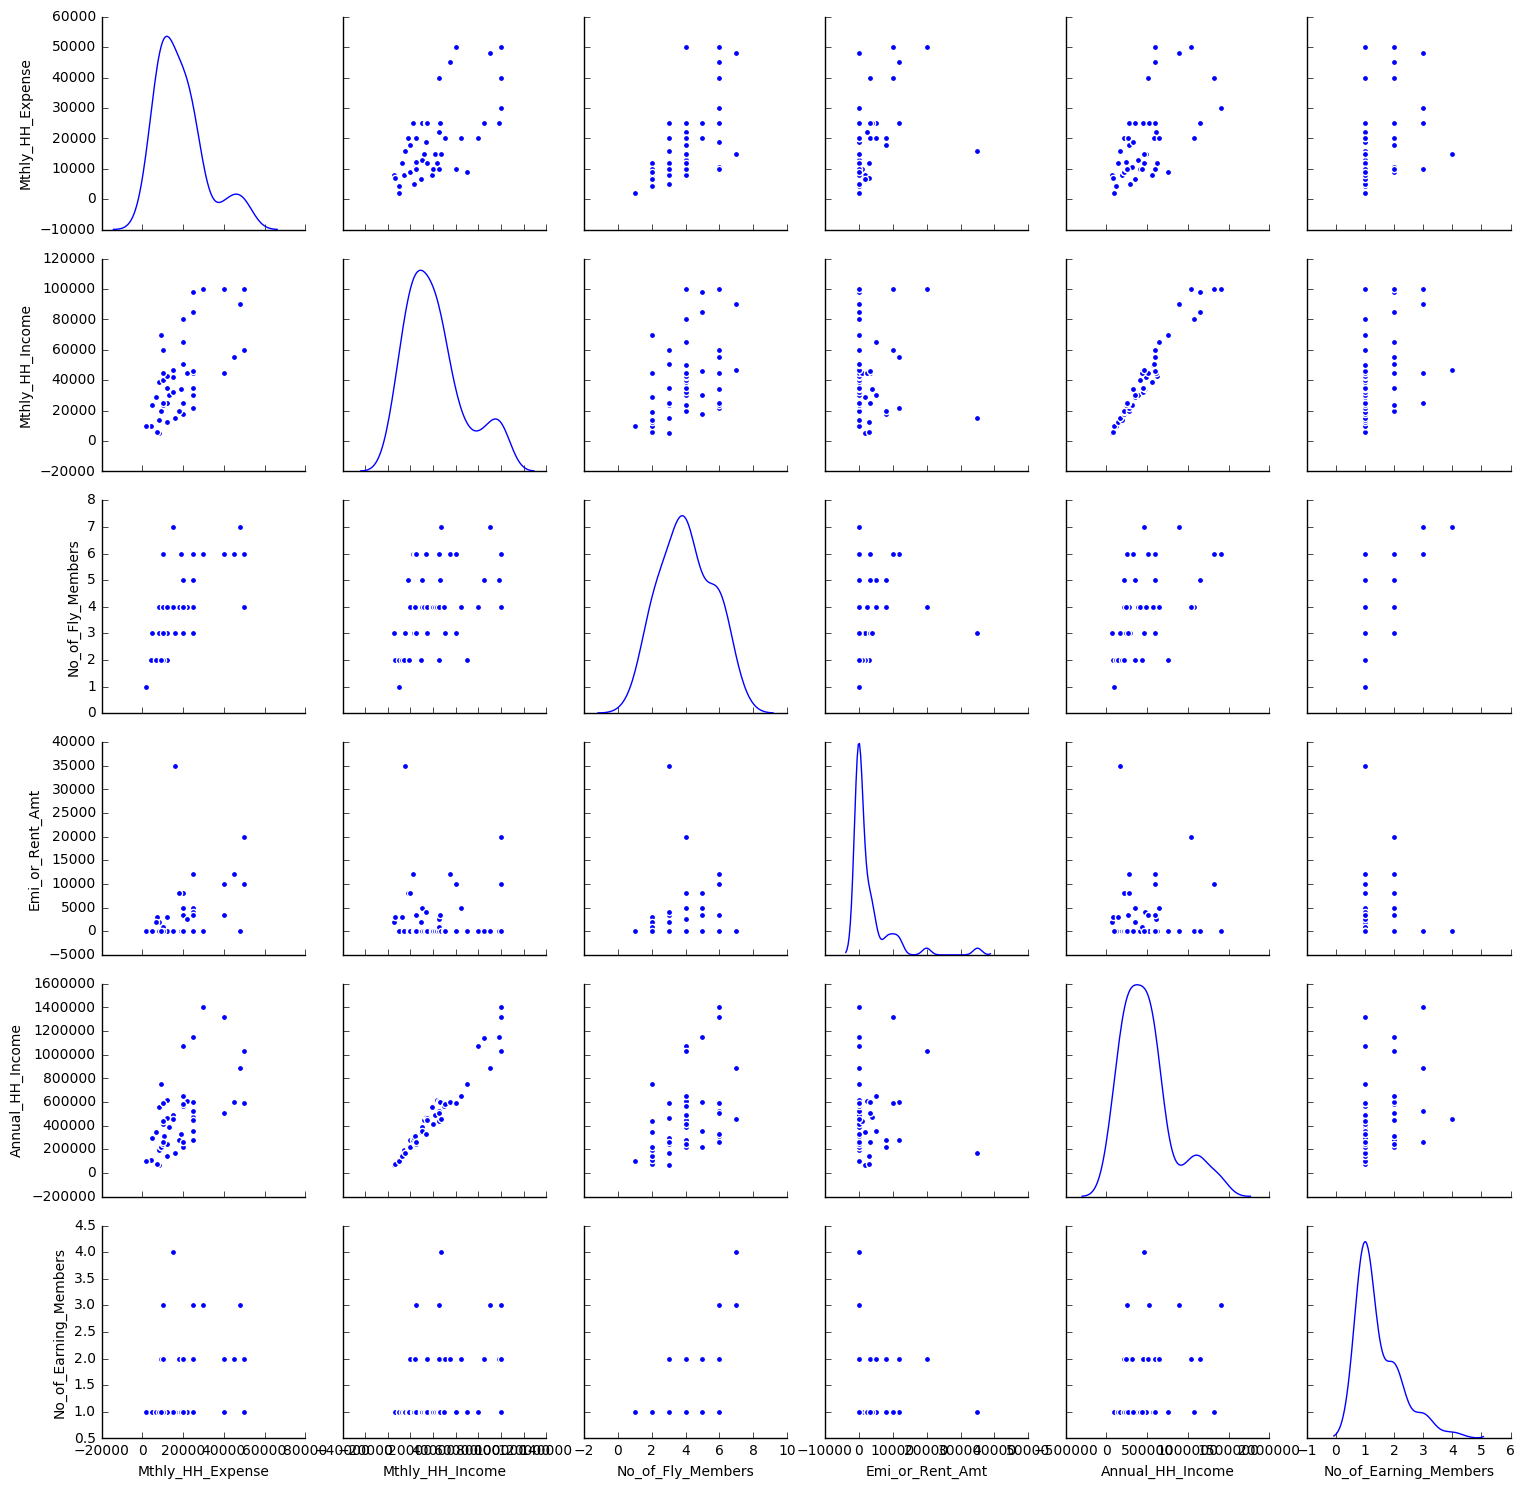

In [25]:
sns.pairplot(inc_exp[['Mthly_HH_Expense', 'Mthly_HH_Income', 'No_of_Fly_Members', 
                      'Emi_or_Rent_Amt', 'Annual_HH_Income', 'No_of_Earning_Members' ]], diag_kind = 'kde')

In [12]:
## Simple Linear Regression Model
import statsmodels.formula.api as sm
linear_mod = sm.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income" , 
                    data = inc_exp).fit()

#Get the model summary
linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     34.97
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           3.40e-07
Time:                        12:00:03   Log-Likelihood:                -526.77
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      48   BIC:                             1061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        6319.1018   2488.733      2.539      0.014      1315.168  1.13e+04
Mthly_HH_Income     0.3008      0.051      5.914      0.000         0.198     0.403
==============================================================================
Omnibus:                        6.455   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.471
Skew:                           0.774   Prob(JB):                       0.0649
Kurtosis:                       3.479   Cond. No.                     9.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
## Correlation check 
inc_exp.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


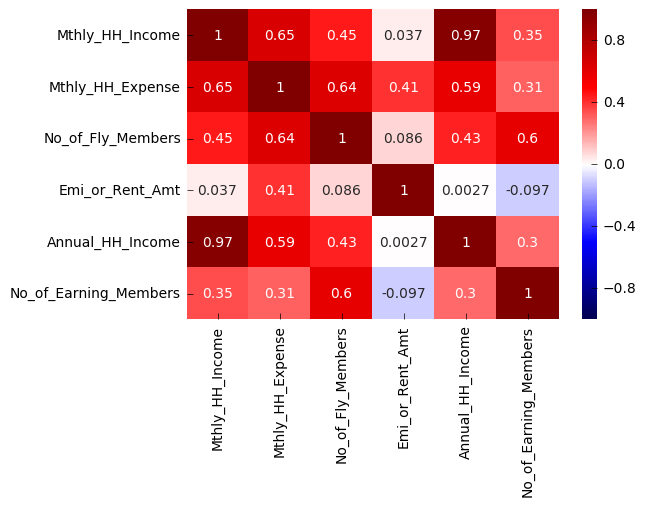

In [26]:
## Correlation Output
sns.heatmap(inc_exp.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [10]:
## Multiple Linear Regression
m_linear_mod = sm.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt+\
                      Annual_HH_Income" ,data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     27.40
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           1.48e-11
Time:                        12:45:46   Log-Likelihood:                -509.59
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      45   BIC:                             1039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept         -5124.8763   2818.362     -1.818      0.076     -1.08e+04   551.597
Mthly_HH_Income       0.4092      0.157      2.608      0.012         0.093     0.725
No_of_Fly_Members  3224.4195    719.071      4.484      0.000      1776.136  4672.703
Emi_or_Rent_Amt       0.6569      0.158      4.162      0.000         0.339     0.975
Annual_HH_Income     -0.0167      0.013     -1.314      0.196        -0.042     0.009
==============================================================================
Omnibus:                        0.142   Durbin-Watson:                   2.377
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.013
Skew:                           0.035   Prob(JB):                        0.993
Kurtosis:                       2.963   Cond. No.                     1.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
## Variance Inflation Factor (VIF) for Multi-Collinearity Check
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(formula,data):
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Var_Name"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    return(vif.round(1))

vif_check =VIF("Mthly_HH_Expense ~ Mthly_HH_Income+\
        No_of_Fly_Members+ Emi_or_Rent_Amt+\
        Annual_HH_Income" ,data = inc_exp)
vif_check 

,Var_Name,VIF
0,Intercept,8.6
1,Mthly_HH_Income,17.7
2,No_of_Fly_Members,1.3
3,Emi_or_Rent_Amt,1.0
4,Annual_HH_Income,17.4


In [28]:
## Multiple Linear Regression
m_linear_mod = sm.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt",
                      data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           5.17e-12
Time:                        12:20:00   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076     -1.09e+04   569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000         0.126     0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000      1773.830  4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000         0.368     1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#prediction
predict = m_linear_mod.predict(inc_exp[["Mthly_HH_Income",
                                        "No_of_Fly_Members",
                                        "Emi_or_Rent_Amt"]])
    
result = pd.DataFrame()
result["Observed"] = inc_exp["Mthly_HH_Expense"] 
result["Expected"] = predict 
result

,Observed,Expected
0,8000,6972.033311
1,7000,4634.991519
2,4500,3421.470393
3,2000,188.896519
4,12000,6002.846988
5,8000,4263.227605
6,16000,31684.488051
7,20000,20283.448672
8,9000,5315.424119
9,9000,11991.011171


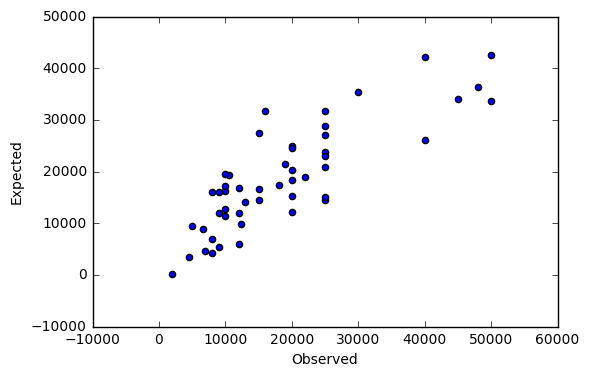

In [31]:
plt.scatter(result["Observed"], result["Expected"])
plt.xlabel("Observed")
plt.ylabel("Expected")

In [32]:
## Root Mean Squared Error = sqrt( (y - yhat)^2/n  )
from sklearn import metrics
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(result["Observed"], result["Expected"])))

Root Mean Squared Error: 6579.8058463


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


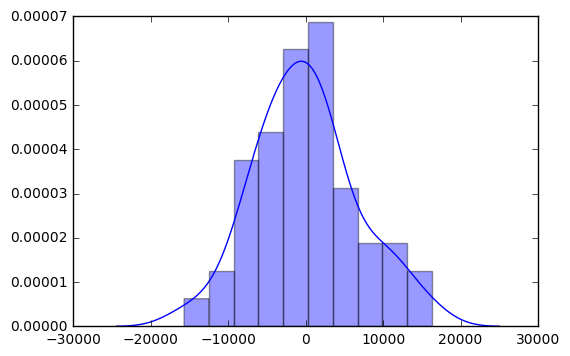

In [37]:
## Residuals should be normally distributed in Linear Regression
residual = result["Observed"] - result["Expected"]
sns.distplot(residual, bins = 10)

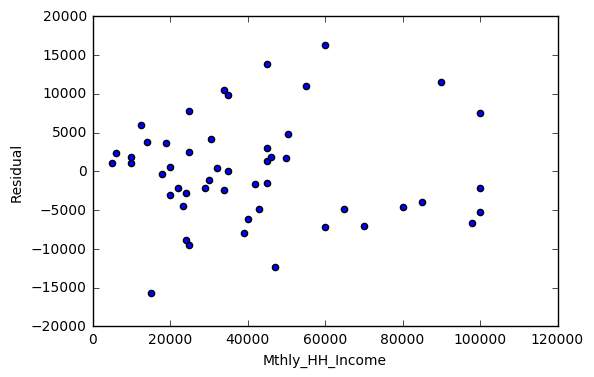

In [38]:
plt.scatter( inc_exp["Mthly_HH_Income"], residual)
plt.xlabel("Mthly_HH_Income")
plt.ylabel("Residual")